In [1]:
%matplotlib inline
import pandas as pd

data = pd.read_csv('clusters.csv')
print("The dataset has {} data points with {} variables each.".format(*data.shape))
print("Column names: {}".format(list(data)))

data.head()

The dataset has 1095 data points with 32 variables each.
Column names: ['cluster_name', 'attempts', 'start_ts', 'end_ts', 'failed', 'completed', 'vm_count', 'build_name', 'with_conda', 'with_conda_version', 'with_docker', 'with_docker_version', 'with_flavor', 'with_foundation', 'with_foundation_version', 'with_gemfire', 'with_gemfire_version', 'with_image', 'with_java_version', 'with_kubernetes', 'with_kubernetes_version', 'with_memcached', 'with_memcached_version', 'with_oracle', 'with_oracle_version', 'with_os_version', 'with_postgresql', 'with_postgresql_version', 'with_tibco', 'with_tibco_version', 'with_ulticom', 'with_ulticom_version']


,cluster_name,attempts,start_ts,end_ts,failed,completed,vm_count,build_name,with_conda,with_conda_version,...,with_memcached_version,with_oracle,with_oracle_version,with_os_version,with_postgresql,with_postgresql_version,with_tibco,with_tibco_version,with_ulticom,with_ulticom_version
0,kalexey.20181227174135,1,1545922452338,1545923103007,False,True,13,20181227_174049_Proj_2127259257,False,4.5.11,...,_default_,False,11.2.0,rhel7.3,False,9.5,False,8.4.5,False,_default_
1,sdmitry.20181128184423,1,1543421316335,1543421667461,False,True,1,20181128_183651_Proj_1735463230,False,4.5.11,...,_default_,True,11.2.0,rhel7.4,False,9.5,False,8.4.5,False,_default_
2,igarus.20181221190350,2,1545408262310,1545409537436,False,True,14,20181220_115814_Proj_2696985,False,4.5.11,...,_default_,False,11.2.0,rhel7.4,False,9.5,False,8.4.5,True,9s65
3,sdmitry.20181211190002,1,1544544132560,1544544935177,False,True,9,20181211_161447_Proj_2631643,False,4.5.11,...,_default_,True,11.2.0,rhel7.4,False,9.5,False,8.4.5,False,_default_
4,abondar.20181207141530,1,1544181372440,1544181831985,False,True,4,20181207_083303_Proj_1027219150,False,4.5.11,...,_default_,True,11.2.0,rhel7.3,False,9.5,False,8.4.5,False,_default_


TODO: describe each column

In [2]:
data['seconds'] = (data.end_ts - data.start_ts)/1000
data = data.drop(columns=['end_ts', 'start_ts'])

In [3]:
data.describe()

,attempts,vm_count,with_postgresql_version,seconds
count,1095.000000,1095.000000,1095.0,1095.000000
mean,1.296804,5.042009,9.5,593.556932
std,1.198162,5.017708,0.0,372.183086
min,1.000000,1.000000,9.5,50.761000
25%,1.000000,1.000000,9.5,353.266000
50%,1.000000,3.000000,9.5,499.470000
75%,1.000000,9.000000,9.5,729.423000
max,10.000000,26.000000,9.5,4539.504000


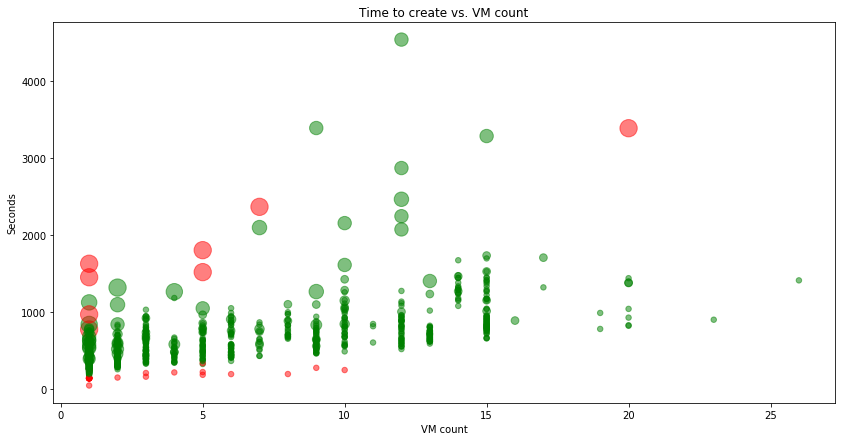

In [4]:
import matplotlib.pyplot as plt
colors = ['red' if failed else 'green' for failed in data['failed']]

plt.figure(figsize=(14,7))
plt.title("Time to create vs. VM count")
plt.xlabel("VM count")
plt.ylabel("Seconds")
plt.scatter(data['vm_count'], data['seconds'], marker='o', sizes=data['attempts']*30, c=colors, alpha=0.5)
plt.show()